## Observations and Insights

## Dependencies and starter code

In [235]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [236]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats = merged_df.groupby(['Drug Regimen'])
summ_stats = pd.DataFrame(merged_df.groupby('Drug Regimen').count())
summ_stats['Mean'] = pd.DataFrame(merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean())
summ_stats['Median'] = pd.DataFrame(merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
summ_stats['Standard Deviation'] = pd.DataFrame(merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std())
summ_stats['Variance'] = pd.DataFrame(merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var())
summ_stats['SEM'] = pd.DataFrame(merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem())

summ_stats_table = summ_stats[['Mean', 'Median', 'Standard Deviation', 'Variance', 'SEM']]
summ_stats_table.head()



,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466


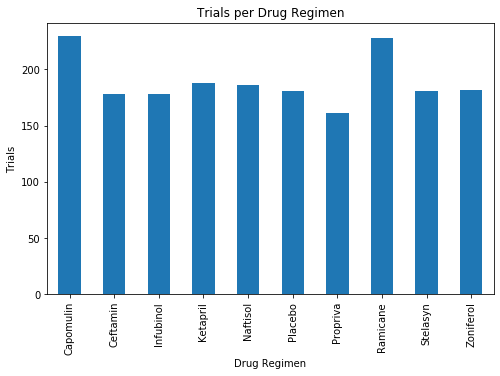

In [237]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = summ_stats[['Mouse ID']]
data_points.plot(kind='bar', figsize=(8,5), legend=False)
plt.title('Trials per Drug Regimen')
plt.ylabel('Trials')
plt.show()

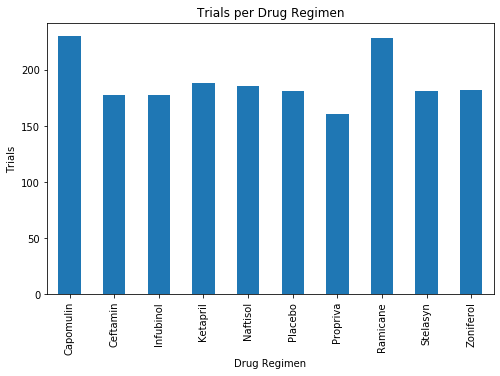

In [238]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data_points))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, data_points['Mouse ID'], width = .5)
plt.xticks(tick_locations, data_points.index.values, rotation='vertical')
plt.xlim(-0.5, len(x_axis)-.5)
plt.ylim(0, max(data_points['Mouse ID'])+12)
plt.title('Trials per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Trials')
plt.show()

## Pie plots

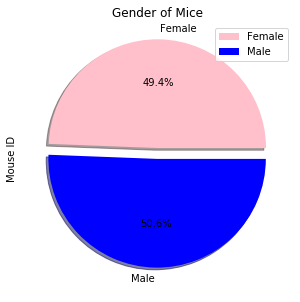

In [240]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = merged_df.groupby(['Mouse ID','Sex'])
mouse_gender = pd.DataFrame(merged_df.groupby(['Sex']).count())
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Mouse ID',figsize=(5,5), title = 'Gender of Mice', colors = colors, explode = explode, shadow = True, autopct="%1.1f%%")

In [117]:
mouse_gender['Mouse ID']

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Gender of Mice')

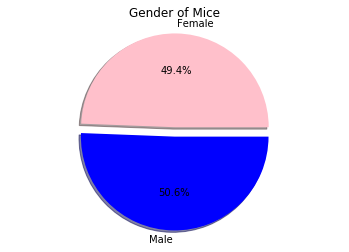

In [242]:
labels = ['Female','Male']
sizes = mouse_gender['Mouse ID']
colors = ['pink', 'blue']
explode = (0.1, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.title('Gender of Mice')


## Quartiles, outliers and boxplots

In [244]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulin = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin',:]
ramicane = merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane', :]
infubinol = merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol', :]
ceftamin = merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin', :]


cap_final_sort = capomulin.groupby('Mouse ID').max()['Timepoint']
ram_final_sort = ramicane.groupby('Mouse ID').max()['Timepoint']
inf_final_sort = infubinol.groupby('Mouse ID').max()['Timepoint']
cef_final_sort = ceftamin.groupby('Mouse ID').max()['Timepoint']

cap_final = pd.DataFrame(cap_final_sort)
ram_final = pd.DataFrame(ram_final_sort)
inf_final = pd.DataFrame(inf_final_sort)
cef_final = pd.DataFrame(cef_final_sort)

cap_df = pd.merge(cap_final, merged_df,  on=('Mouse ID','Timepoint'),how='left')
ram_df = pd.merge(ram_final, merged_df,  on=('Mouse ID','Timepoint'),how='left')
inf_df = pd.merge(inf_final, merged_df,  on=('Mouse ID','Timepoint'),how='left')
cef_df = pd.merge(cef_final, merged_df,  on=('Mouse ID','Timepoint'),how='left')

cap_vol = cap_df['Tumor Volume (mm3)']
cap_quartiles = cap_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

ram_vol = ram_df['Tumor Volume (mm3)']
ram_quartiles = ram_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

inf_vol = inf_df['Tumor Volume (mm3)']
inf_quartiles = inf_vol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

cef_vol = cef_df['Tumor Volume (mm3)']
cef_quartiles = cef_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq

print(f"Any tumors with a final volume greater than {cap_upperq} or lower than {cap_lowerq} treated Capomulin might be be outliers.")
print(f"Any tumors with a final volume greater than {ram_upperq} or lower than {ram_lowerq} treated Ramicane might be be outliers.")
print(f"Any tumors with a final volume greater than {inf_upperq} or lower than {inf_lowerq} treated Infubinol might be be outliers.")
print(f"Any tumors with a final volume greater than {cef_upperq} or lower than {cef_lowerq} treated Ceftamin might be be outliers.")


Any tumors with a final volume greater than 40.1592203 or lower than 32.37735684 treated Capomulin might be be outliers.
Any tumors with a final volume greater than 40.65900627 or lower than 31.56046955 treated Ramicane might be be outliers.
Any tumors with a final volume greater than 65.52574285 or lower than 54.04860769 treated Infubinol might be be outliers.
Any tumors with a final volume greater than 64.29983003 or lower than 48.72207785 treated Ceftamin might be be outliers.


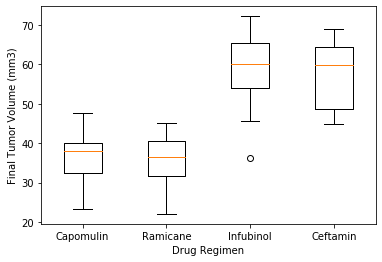

In [245]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_vol = [cap_vol, ram_vol, inf_vol, cef_vol]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and scatter plots

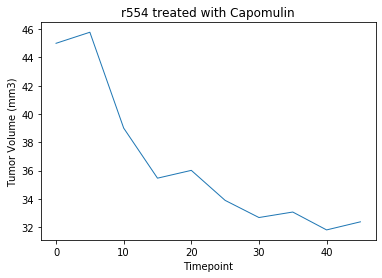

In [247]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_data_point = capomulin.loc[capomulin['Mouse ID'] == 'r554',:]
x_axis = line_data_point['Timepoint']
y_axis = line_data_point['Tumor Volume (mm3)']
plt.title('r554 treated with Capomulin')
plt.plot(x_axis, y_axis ,linewidth=1)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

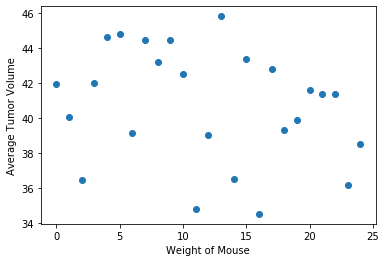

In [248]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_axis = np.arange(len(capomulin.groupby(capomulin['Mouse ID'])['Weight (g)']))
y_axis = capomulin.groupby(capomulin['Mouse ID'])['Tumor Volume (mm3)'].mean()
plt.scatter(x_axis,y_axis)
plt.xlabel('Weight of Mouse')
plt.ylabel('Average Tumor Volume')
plt.show()

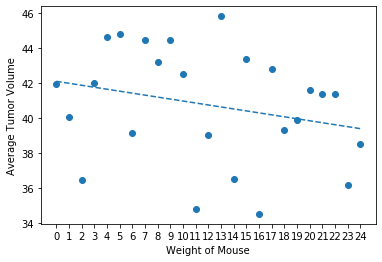

The correlation between weight and average tumor value is -0.25.


In [249]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,fit,'--')
plt.xlabel('Weight of Mouse')
plt.ylabel('Average Tumor Volume')
plt.xticks(mouse_weight)
plt.show()
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and average tumor value is {corr}.')